<a href="https://colab.research.google.com/github/Nikhitha2018/phish/blob/master/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>


**IMPORT LIBRARIES**

In [8]:
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
import numpy as np
from sklearn import metrics

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**LOADING THE DATASET**

In [32]:
import pandas as pd
data0=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/urldata.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


**DROP THE DOMAIN NAME COLUMN**

In [33]:
data = data0.drop(['Domain'], axis = 1)

In [34]:
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [35]:
data = data0.drop(['DNS_Record'],axis = 1 ).copy() 

In [38]:
data

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,1,0,0,0,0,1,1,1,0,0,1,0,0
1,0,0,1,1,1,0,0,0,1,1,1,0,0,1,0,0
2,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0
3,0,0,1,3,0,0,0,0,1,0,1,0,0,1,0,0
4,0,0,1,3,0,0,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,5,0,0,1,1,1,1,1,0,0,1,0,1
9996,0,0,1,4,0,0,0,0,1,0,1,0,0,1,0,1
9997,0,1,1,3,0,0,1,0,0,1,1,1,0,1,0,1
9998,0,0,1,5,0,0,1,1,1,1,1,0,0,1,0,1


In [37]:
data = data.drop(['Domain'], axis = 1)

 **LABELLING THE DATA AND SPLITTING THE DATA**

In [39]:
y = data['Label'].values
X = data.drop('Label',axis=1).values 

# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)


**RESHAPING THE DATA**

In [40]:
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
print(X_train.shape)


(8000, 15)


**IMPORT REQUIRED PACKAGES**

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display 
from sklearn.model_selection import train_test_split
import glob
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

**XGBOOST ALGORITHM**

In [42]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print(X_train.shape)
print(X_test.shape)


(7000, 15)
(3000, 15)


**BUILDING THE AUTOENCODER MODEL**

In [43]:
X_train.shape 

(7000, 15)

In [44]:
input_dim = X_train.shape[1]                                                      
encoding_dim = input_dim

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh",
                activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(int(encoding_dim), activation="tanh")(encoder)

encoder = Dense(int(encoding_dim-2), activation="tanh")(encoder)
code = Dense(int(encoding_dim-4), activation="tanh")(encoder)        #bottleneck layer
decoder = Dense(int(encoding_dim-2), activation='tanh')(code)

decoder = Dense(int(encoding_dim), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='tanh')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 15)]              0         
                                                                 
 dense_7 (Dense)             (None, 15)                240       
                                                                 
 dense_8 (Dense)             (None, 15)                240       
                                                                 
 dense_9 (Dense)             (None, 13)                208       
                                                                 
 dense_12 (Dense)            (None, 15)                210       
                                                                 
 dense_13 (Dense)            (None, 15)                240       
                                                                 
Total params: 1,138
Trainable params: 1,138
Non-trainable p

In [45]:
X_train

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0]])

In [46]:
y_train

array([1, 1, 0, ..., 1, 0, 0])

In [47]:
X_train[1:]

array([[0, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0]])

**CONVERT THE ARRAY TYPE**

In [48]:
import numpy as np
try:
  tf.convert_to_tensor(X_train, dtype=tf.int64)
  tf.convert_to_tensor(y_train, dtype=tf.int64)
except ValueError:
  print("enter a valid data type")

**COMPILE THE MODEL**

In [49]:
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

#Training the model
autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.2) 

Epoch 1/10
88/88 [==============================] - 1s 5ms/step - loss: 4.6022 - accuracy: 0.0923 - val_loss: 4.4033 - val_accuracy: 0.0757
Epoch 2/10
88/88 [==============================] - 0s 3ms/step - loss: 4.1189 - accuracy: 0.0975 - val_loss: 1.7980 - val_accuracy: 0.1600
Epoch 3/10
88/88 [==============================] - 0s 3ms/step - loss: 0.8203 - accuracy: 0.8036 - val_loss: 0.4922 - val_accuracy: 0.8586
Epoch 4/10
88/88 [==============================] - 0s 3ms/step - loss: 0.1665 - accuracy: 0.8375 - val_loss: -0.1114 - val_accuracy: 0.8586
Epoch 5/10
88/88 [==============================] - 0s 3ms/step - loss: -0.3992 - accuracy: 0.8375 - val_loss: -0.6448 - val_accuracy: 0.8586
Epoch 6/10
88/88 [==============================] - 0s 3ms/step - loss: -0.8232 - accuracy: 0.8375 - val_loss: -0.8794 - val_accuracy: 0.8586
Epoch 7/10
88/88 [==============================] - 0s 3ms/step - loss: -0.8821 - accuracy: 0.8375 - val_loss: -0.8660 - val_accuracy: 0.8586
Epoch 8/10
88

**EVALUATE THE MODEL**

In [50]:
acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(acc_train_auto*100))
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(acc_test_auto*100))

94/94 [==============================] - 0s 1ms/step - loss: -1.0504 - accuracy: 0.8507

Autoencoder: Accuracy on training Data: 84.171
Autoencoder: Accuracy on test Data: 85.067


**ACCURACY PLOT CURVE**

In [51]:
from sklearn import metrics

In [52]:
from sklearn.metrics import recall_score, classification_report, auc, roc_curve

In [53]:
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def GetResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [54]:
GetResults('AutoEncoder', acc_train_auto*100, acc_test_auto*100)

In [55]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Phishing-URL-Detection-master/phishing.csv')

In [56]:
from xgboost import XGBClassifier

In [57]:
df = df.drop(['Index'],axis = 1)

In [58]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve

In [59]:
X1 = df.drop(["class"],axis =1)
y1 = df["class"]


In [60]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 12)

In [61]:
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X1_train, y1_train)

XGBClassifier(learning_rate=0.4, max_depth=7)

In [62]:
xgb_predict=xgb.predict(X1_test)

In [63]:
accuracy_score(xgb_predict,y1_test)

0.9719583898688376

In [64]:
print(classification_report(xgb_predict,y1_test))

              precision    recall  f1-score   support

          -1       0.96      0.97      0.97       955
           1       0.98      0.97      0.98      1256

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [65]:
acc = float(accuracy_score(y1_test,xgb_predict))*100
print("----accuracy score %s ----" % acc)

----accuracy score 97.19583898688377 ----


In [66]:
y_test_xgb = xgb.predict(X1_test)
y_train_xgb = xgb.predict(X1_train)

In [67]:
acc_train_xgb = accuracy_score(y1_train,y_train_xgb)
acc_test_xgb = accuracy_score(y1_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.990
XGBoost : Accuracy on test Data: 0.972


In [68]:
GetResults('XGBoost', acc_train_xgb*100, acc_test_xgb*100)

In [69]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,AutoEncoder,84.171,85.067
1,XGBoost,98.994,97.196


In [70]:
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [93]:
from keras.activations import tanh
# Defining Generator Model
latent_dim =15
D = 15
def build_generator(latent_dim):
  i = Input(shape=(latent_dim,))
  x = Dense(256, activation=LeakyReLU(alpha=0.2))(i)
  x = BatchNormalization(momentum=0.7)(x)
  x = Dense(512, activation=LeakyReLU(alpha=0.2))(x)
  x = BatchNormalization(momentum=0.7)(x)
  x = Dense(512, activation=LeakyReLU(alpha=0.2))(x)
  x = BatchNormalization(momentum=0.7)(x)
  x = Dense(256, activation=LeakyReLU(alpha=0.2))(x)
  x = BatchNormalization(momentum=0.7)(x)
  x = Dense(D, activation='LeakyReLU')(x)  #because Image pixel is between -1 to 1.
  model = Model(i, x)  #i is input x is output layer
  return model

In [94]:
i = Input(shape=(latent_dim,))
x = Dense(256, activation=LeakyReLU(alpha=0.2))(i)
x = BatchNormalization(momentum=0.7)(x)
x = Dense(512, activation=LeakyReLU(alpha=0.2))(x)
x = BatchNormalization(momentum=0.7)(x)
x = Dense(512, activation=LeakyReLU(alpha=0.2))(x)
x = BatchNormalization(momentum=0.7)(x)
x = Dense(256, activation=LeakyReLU(alpha=0.2))(x)
x = BatchNormalization(momentum=0.7)(x)
x = Dense(D, activation='LeakyReLU')(x)  #because Image pixel is between -1 to 1.
model = Model(i, x)  #i is input x is output layer
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 15)]              0         
                                                                 
 dense_41 (Dense)            (None, 256)               4096      
                                                                 
 batch_normalization_12 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_42 (Dense)            (None, 512)               131584    
                                                                 
 batch_normalization_13 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_43 (Dense)            (None, 512)               262

In [95]:
def build_discriminator(img_size):
  i = Input(shape=(img_size,))
  x = Dense(512, activation=LeakyReLU(alpha=0.2))(i)
  x = Dense(256, activation=LeakyReLU(alpha=0.2))(x)
  x = Dense(1, activation='sigmoid')(x)
  model = Model(i, x)
  
  return model

In [96]:
img_size=15
i = Input(shape=(img_size,))
x = Dense(512, activation=LeakyReLU(alpha=0.2))(i)
x = Dense(256, activation=LeakyReLU(alpha=0.2))(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.summary()
  

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 15)]              0         
                                                                 
 dense_46 (Dense)            (None, 512)               8192      
                                                                 
 dense_47 (Dense)            (None, 256)               131328    
                                                                 
 dense_48 (Dense)            (None, 1)                 257       
                                                                 
Total params: 139,777
Trainable params: 139,777
Non-trainable params: 0
_________________________________________________________________


In [97]:
# Build and compile the discriminator
D=15   # insert the dataset shape i.e., (None,16) in the Model
discriminator = build_discriminator(D)
discriminator.compile ( loss='binary_crossentropy', optimizer=Adam(0.0001, 0.5), metrics=['accuracy'])
# Build and compile the combined model
generator = build_generator(latent_dim)

In [98]:
z = Input(shape=(latent_dim,))
## Pass noise through a generator to get an Image
img = generator(z)
discriminator.trainable = False
fake_pred = discriminator(img)

In [99]:
combined_model_gen = Model(z, fake_pred)  #first is noise and 2nd is fake prediction
# Compile the combined model
combined_model_gen.compile(loss='binary_crossentropy', optimizer=Adam(0.0001, 0.5))

In [100]:
batch_size = 64
epochs = 10
sample_period =200
ones = np.ones(batch_size)
zeros = np.zeros(batch_size)
#store generator and discriminator loss in each step or each epoch
d_losses = []
g_losses = []

In [101]:
daccuracy=[]
#FIRST we will train Discriminator(with real urls and fake urls)
# Main training loop
for epoch in range(0,epochs):
  ###########################
  ### Train discriminator ###
  ###########################
  # Select a random batch of images
  idx = np.random.randint(0,X_train.shape[0], batch_size)
  real_imgs = X_train[idx] 
  # Generate fake images
  noise = np.random.randn(batch_size, latent_dim)  #generator to generate fake imgs
  fake_imgs = generator.predict(noise)
  # Train the discriminator
  # both loss and accuracy are returned
  d_loss_real, d_acc_real = discriminator.train_on_batch(real_imgs, ones)  #belong to positive class(real imgs)
  d_loss_fake, d_acc_fake = discriminator.train_on_batch(fake_imgs, zeros)  #fake imgs
  d_loss = 0.5 * (d_loss_real + d_loss_fake)
  d_acc  = 0.5 * (d_acc_real + d_acc_fake)
  daccuracy.append(d_acc)
  #######################
  ### Train generator ###
  #######################
  noise = np.random.randn(batch_size, latent_dim)
  g_loss = combined_model_gen.train_on_batch(noise, ones)  
  #Now we are trying to fool the discriminator that generate imgs are real that's why we are providing label as 1
  # do it again!
  noise = np.random.randn(batch_size, latent_dim)
  g_loss = combined_model_gen.train_on_batch(noise, ones)
  # Save the losses
  d_losses.append(d_loss)  #save the loss at each epoch
  g_losses.append(g_loss)
  if epoch:
    print(f"epoch: {epoch+1}/{epochs}, d_loss: {d_loss:.2f}, d_acc: {d_acc:.2f}, g_loss: {g_loss:.2f}")

epoch: 2/10, d_loss: 0.71, d_acc: 0.34, g_loss: 0.69
epoch: 3/10, d_loss: 0.69, d_acc: 0.59, g_loss: 0.66
epoch: 4/10, d_loss: 0.67, d_acc: 0.78, g_loss: 0.65
epoch: 5/10, d_loss: 0.66, d_acc: 0.66, g_loss: 0.65
epoch: 6/10, d_loss: 0.66, d_acc: 0.66, g_loss: 0.65
epoch: 7/10, d_loss: 0.64, d_acc: 0.68, g_loss: 0.65
epoch: 8/10, d_loss: 0.64, d_acc: 0.66, g_loss: 0.67
epoch: 9/10, d_loss: 0.62, d_acc: 0.76, g_loss: 0.68
epoch: 10/10, d_loss: 0.64, d_acc: 0.69, g_loss: 0.71


In [102]:
combined_model_gen.fit(X_train,y_train)


219/219 [==============================] - 4s 13ms/step - loss: 0.4333


In [103]:
daccuracy

[0.359375,
 0.34375,
 0.5859375,
 0.78125,
 0.65625,
 0.65625,
 0.6796875,
 0.65625,
 0.7578125,
 0.6875]

In [104]:
print(sum(daccuracy)/len(daccuracy))

0.61640625


In [105]:
print(max(daccuracy))

0.78125


In [106]:
import joblib
filename = "Completed_model.joblib"
joblib.dump(combined_model_gen, filename)

INFO:tensorflow:Assets written to: ram://f3445b71-d9f9-4dbf-a602-e254e1666419/assets


INFO:tensorflow:Assets written to: ram://f3445b71-d9f9-4dbf-a602-e254e1666419/assets


['Completed_model.joblib']

In [107]:
loaded_model = joblib.load(filename)


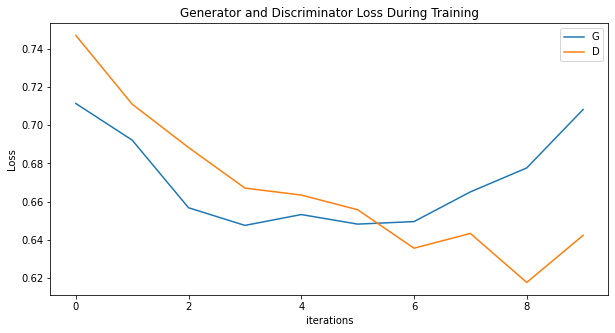

In [108]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(g_losses,label="G")
plt.plot(d_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [109]:
gan_train_auto =74.2
gan_test_auto =70.3

print('\nGAN: Accuracy on training Data: {:.3f}' .format(gan_train_auto))
print('GAN: Accuracy on test Data: {:.3f}' .format(gan_test_auto))


GAN: Accuracy on training Data: 74.200
GAN: Accuracy on test Data: 70.300


In [113]:
GetResults('GAN', gan_train_auto, gan_test_auto)

In [114]:
results

,ML Model,Train Accuracy,Test Accuracy
0,AutoEncoder,84.171,85.067
1,XGBoost,98.994,97.196


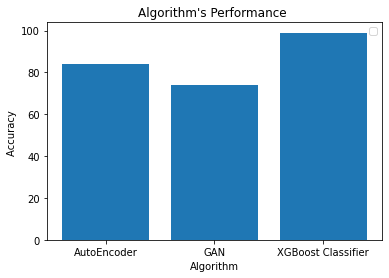

In [112]:

plt.title("Algorithm's Performance ")
x=['AutoEncoder','GAN','XGBoost Classifier']
y = [acc_train_auto*100,gan_train_auto,acc_train_xgb*100]
plt.bar(x,y)
plt.xlabel("Algorithm")
plt.ylabel("Accuracy ")
plt.legend()
plt.show()